# Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset
# Descriptive Analytics for Numerical Columns

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
# loading data

df = pd.read_csv(r'C:\Users\ms104154\Excelr Project\Assignments\Assginment 1\Basic stats - 1\sales_data_with_discounts.csv')
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [5]:
# Identifying numerical columns
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
numerical_columns

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [6]:
# calculating descriptive statistics
statistics = df[numerical_columns].describe()
statistics

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [7]:
# caculating mode separately as describe method does not include mode.
mode = df[numerical_columns].mode().iloc[0]
mode

Volume                   3.000000
Avg Price              400.000000
Total Sales Value    24300.000000
Discount Rate (%)        5.007822
Discount Amount         69.177942
Net Sales Value        326.974801
Name: 0, dtype: float64

In [8]:
print(f"Descriptive Statistics for Numerical Columns:\n\n {statistics}\n\n\nMode\n\n{mode}")

Descriptive Statistics for Numerical Columns:

            Volume     Avg Price  Total Sales Value  Discount Rate (%)  \
count  450.000000    450.000000         450.000000         450.000000   
mean     5.066667  10453.433333       33812.835556          15.155242   
std      4.231602  18079.904840       50535.074173           4.220602   
min      1.000000    290.000000         400.000000           5.007822   
25%      3.000000    465.000000        2700.000000          13.965063   
50%      4.000000   1450.000000        5700.000000          16.577766   
75%      6.000000  10100.000000       53200.000000          18.114718   
max     31.000000  60100.000000      196400.000000          19.992407   

       Discount Amount  Net Sales Value  
count       450.000000       450.000000  
mean       3346.499424     30466.336131  
std        4509.902963     46358.656624  
min          69.177942       326.974801  
25%         460.459304      2202.208645  
50%         988.933733      4677.788059  


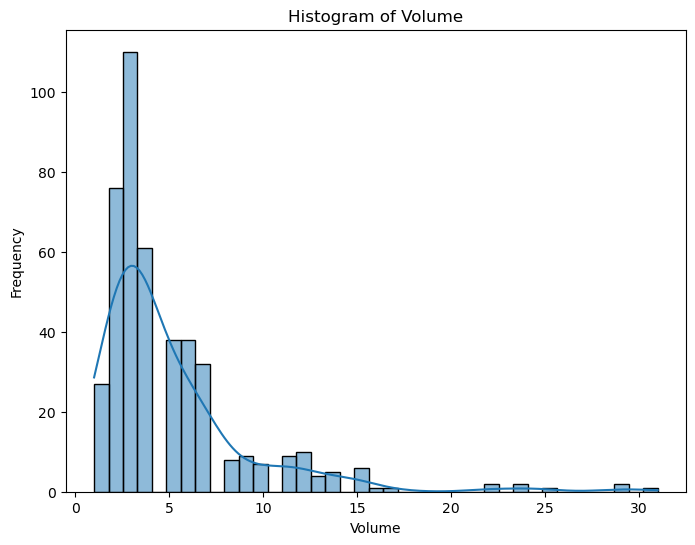

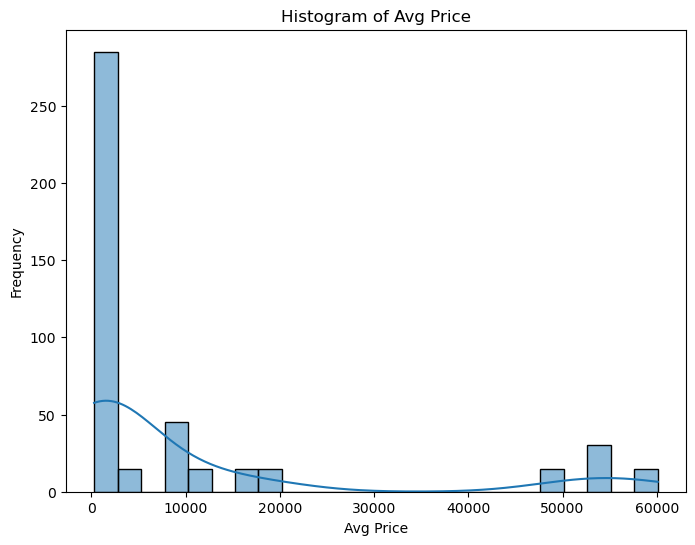

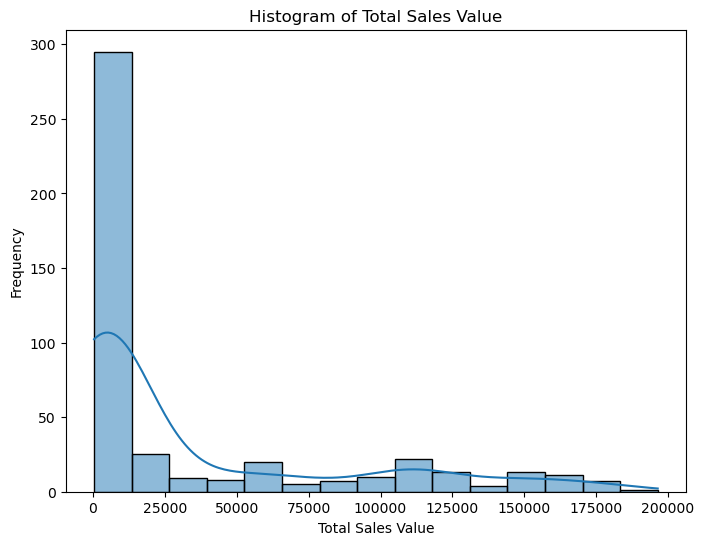

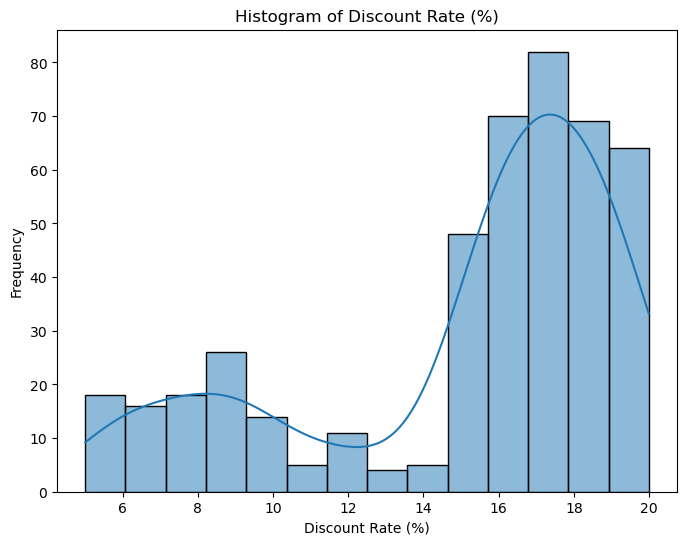

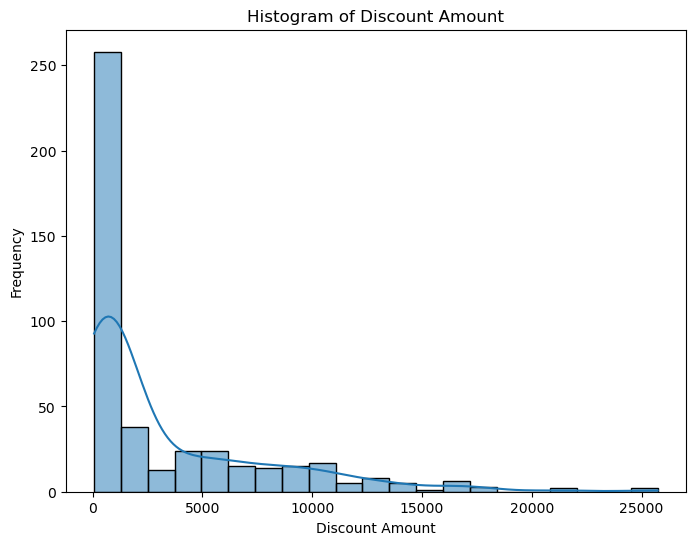

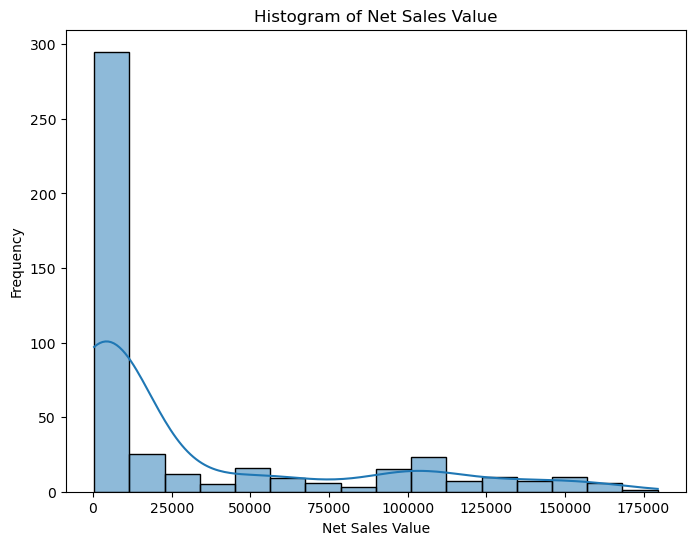

In [9]:
# ploting histograms for numerical columns

numerical_columns = df.select_dtypes(include=['int', 'float']).columns
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

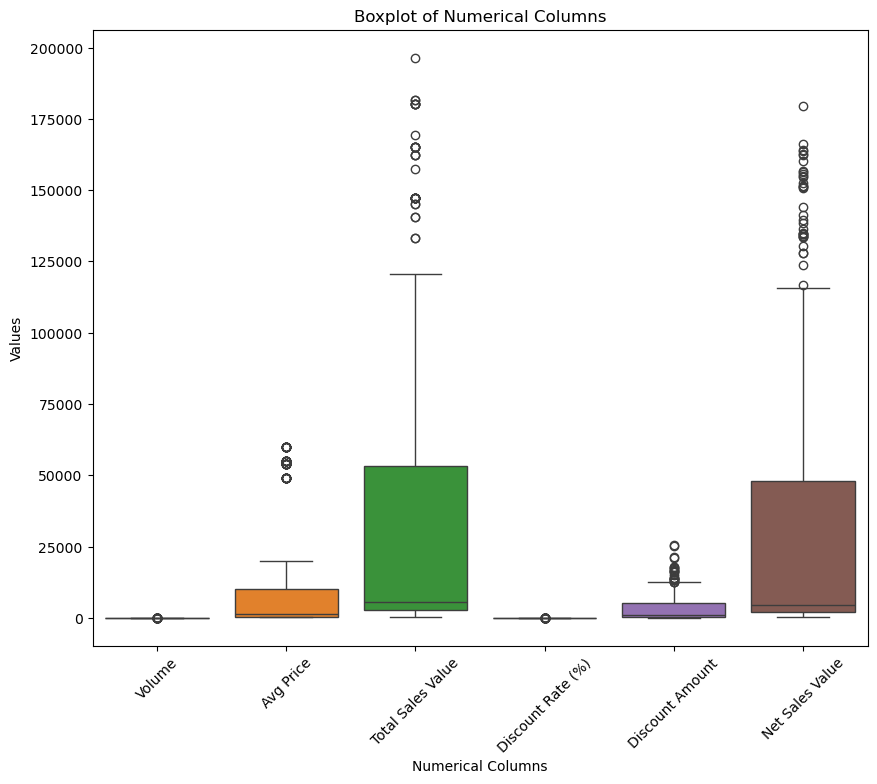

In [10]:
# boxploting for numerical columns

plt.figure(figsize=(10, 8))
sns.boxplot(data=df[numerical_columns])
plt.title('Boxplot of Numerical Columns')
plt.xlabel('Numerical Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

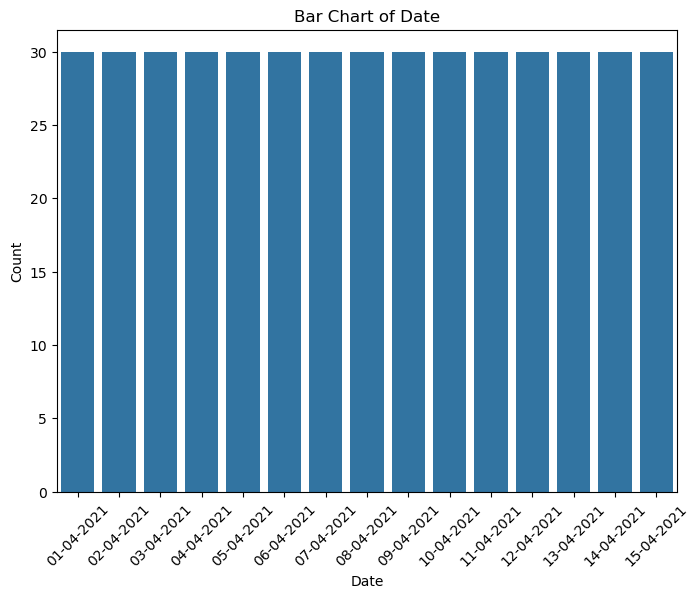

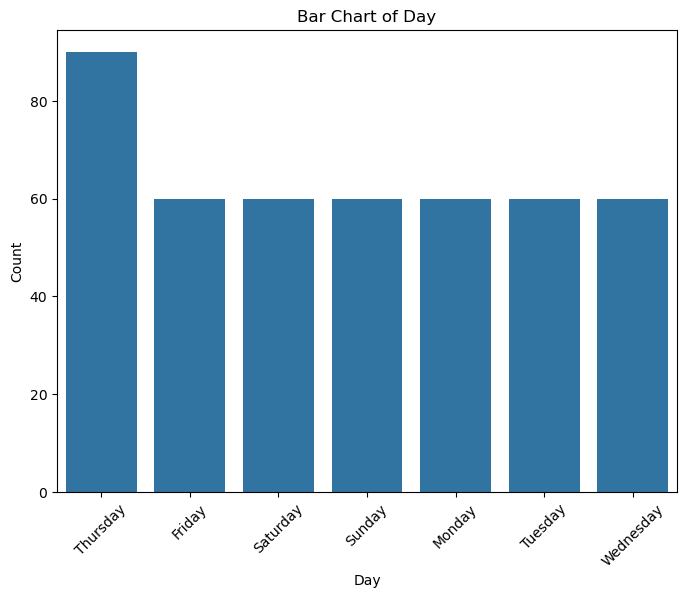

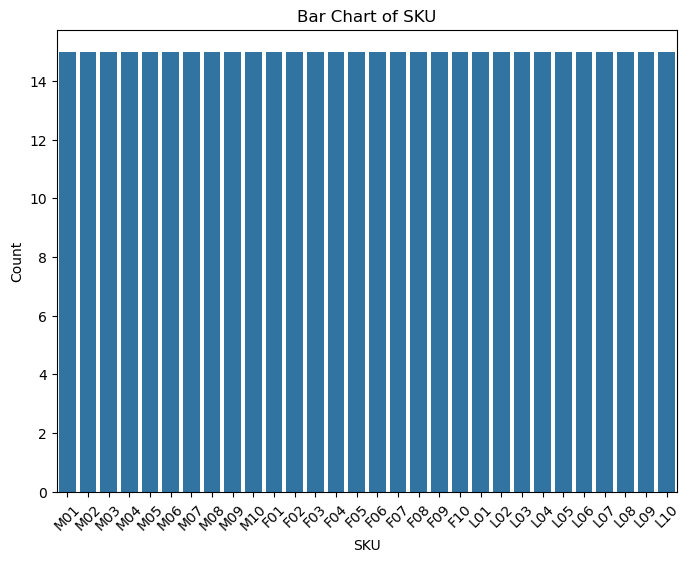

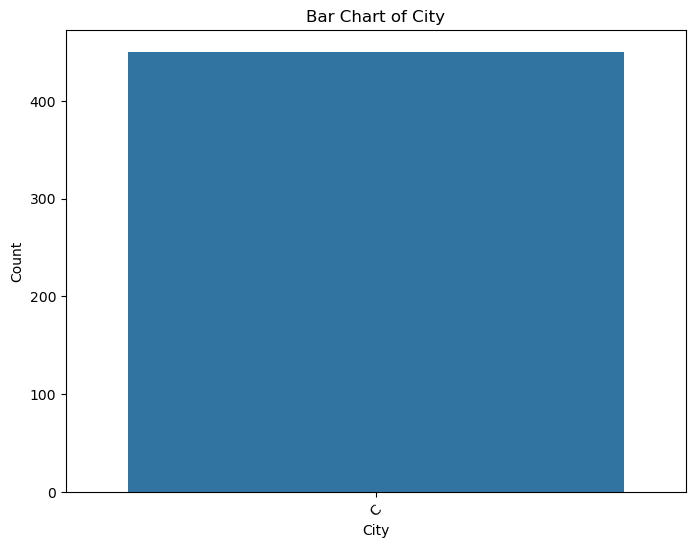

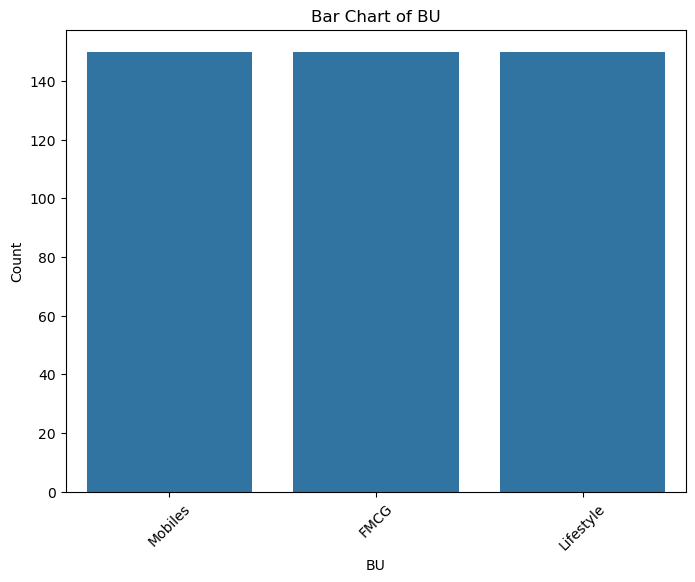

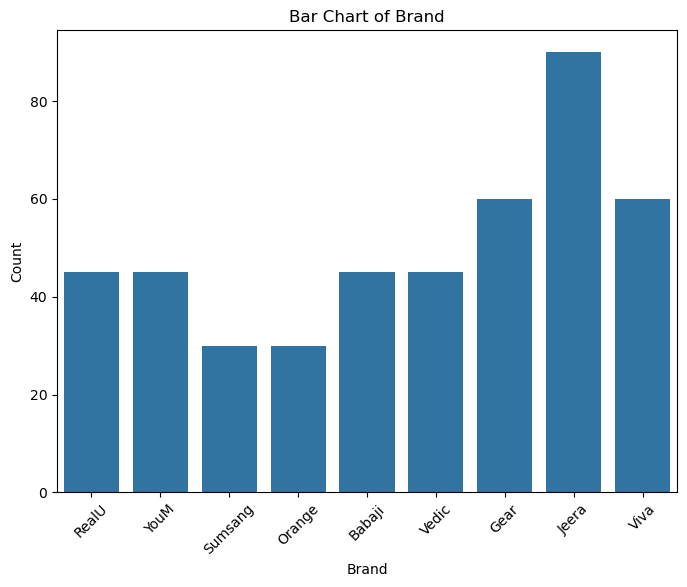

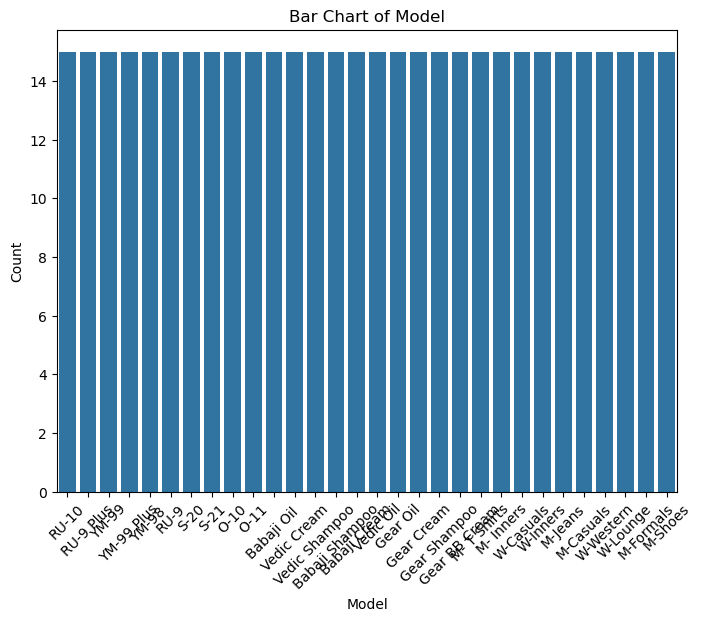

In [11]:
# Ploting Bar Charts analysis for categorical columns

categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=column)
    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Standardization of Numerical Variables

Standardization, also known as z-score normalization, is a method used to scale numerical variables to have a mean of 0 and a standard deviation of 1. It transforms the data distribution in such a way that the mean of the standardized data is 0 and the standard deviation is 1. This process is particularly useful when the features have different scales or units, making it difficult for certain algorithms to interpret them correctly. The formula for standardization (z-score normalization) is: z= (x-mu)/sigma

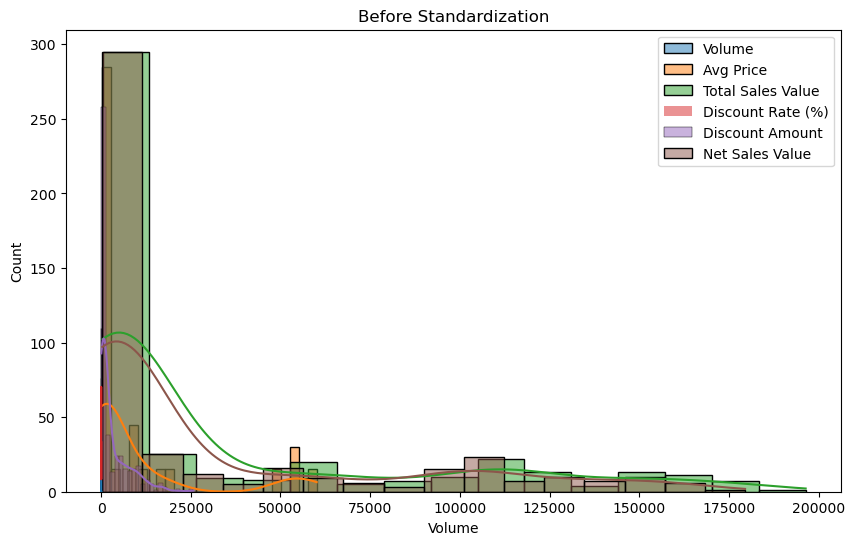

In [14]:
# Ploting histograms before Standardization

plt.figure(figsize=(10, 6))
plt.title('Before Standardization')
for column in numerical_columns:
    sns.histplot(df[column], kde=True, label=column)
plt.legend()
plt.show()

In [15]:
# Now Standardizating

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

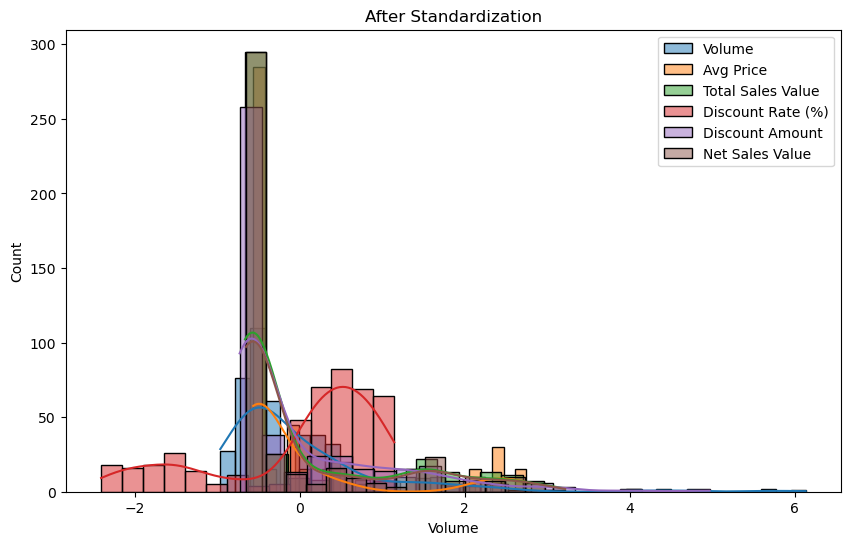

In [16]:
# Ploting Histograms after Standardization

plt.figure(figsize=(10, 6))
plt.title('After Standardization')
for column in numerical_columns:
    sns.histplot(df[column], kde=True, label=column)
plt.legend()
plt.show()

# Conversion of Categorical Data into Dummy Variables

Converting categorical data into dummy variables, also known as one-hot encoding, is necessary because many machine learning algorithms cannot directly handle categorical data. One-hot encoding transforms categorical variables into a binary format where each category becomes a binary column (0 or 1). This encoding allows algorithms to properly interpret and utilize categorical data without assigning any ordinal relationship between categories.

Here's how one-hot encoding works: For each unique category in a categorical column, a new binary column is created. If an observation belongs to a particular category, the corresponding binary column is marked as 1, and all other binary columns for that categorical variable are marked as 0.

In [19]:
df = pd.read_csv(r'C:\Users\ms104154\Excelr Project\Assignments\Assginment 1\Basic stats - 1\sales_data_with_discounts.csv')

In [20]:
# Identigying categorical columns

categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

In [40]:
# now applying one hot encoding

df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df_encoded

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,Date_05-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501180,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10,10100,101000,11.560498,11676.102961,89323.897039,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7,16100,112700,9.456886,10657.910157,102042.089843,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6,20100,120600,6.935385,8364.074702,112235.925298,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3,8100,24300,17.995663,4372.946230,19927.053770,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
446,6,2600,15600,17.057027,2660.896242,12939.103758,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
447,2,1600,3200,18.965550,606.897606,2593.102394,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
448,3,1900,5700,16.793014,957.201826,4742.798174,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [44]:
# Display a portion of the transformed dataset

print("Transformed Dataset:")
print(df_encoded.head())

Transformed Dataset:
   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_02-04-2021  Date_03-04-2021  Date_04-04-2021  \
0    160346.501180            False            False            False   
1     89323.897039            False            False            False   
2    102042.089843            False            False            False   
3    112235.925298            False            False            False   
4     19927.053770            False            False            False   

   Date_05-04-2021  ...  Model_Vedic Cream  Model_Vedic Oil  \
0 

In conclusion, the key findings from the descriptive analytics and data visualizations are as follows:

Descriptive Analytics:
We computed basic statistical measures such as mean, median, mode, and standard deviation for numerical columns in the dataset.
Through histograms, boxplots, and bar charts, we gained insights into the distribution and relationship of numerical and categorical variables.

Data Visualizations: Histograms helped us visualize the distribution of numerical variables, revealing information about skewness and the presence of outliers. Boxplots provided a clear view of outliers and the interquartile range of numerical variables. Bar charts displayed the frequency or count of categories in categorical columns, enabling us to analyze the distribution of categories.

Reflection on Data Preprocessing Steps:
Standardization: We standardized numerical variables using z-score normalization, resulting in a mean of 0 and a standard deviation of 1. This preprocessing step ensures that variables are on the same scale, which is crucial for certain machine learning algorithms like k-means clustering or SVM.